In [4]:
# Data Manipulation and Handling
import polars as pl
import pandas as pd
import numpy as np
import psycopg2

# DB Credentials
from dotenv import load_dotenv
import os
import sys
from sqlalchemy import create_engine

# Machine Learning Libraries
import torch
import xgboost as xgb
import lightgbm as lgb
# from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.stats import chi2_contingency, poisson, stats
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Gradient Boosting Libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Model Lifecycle Management
import mlflow
import mlflow.sklearn

# Distributed Computing
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier as SparkRFClassifier

# Model Interpretability
import shap

# Hyperparameter Optimization
import optuna

# Automated Feature Engineering
import featuretools as ft

# Add parent directory to sys.path
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

# Custom Modules
from fetch_data_hook import fetch_sql_code, fetch_sql_file

ModuleNotFoundError: No module named 'statsmodels'

In [5]:
df = pd.read_csv('../../data/model_df_v1.0.csv')

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     5584 non-null   int64  
 1   risk_tolerance                 5584 non-null   object 
 2   investment_experience          5584 non-null   object 
 3   liquidity_needs                5584 non-null   object 
 4   platform                       5584 non-null   object 
 5   time_spent                     5584 non-null   float64
 6   instrument_type_first_traded   5584 non-null   object 
 7   first_deposit_amount           5584 non-null   float64
 8   time_horizon                   5584 non-null   object 
 9   user_id                        5584 non-null   object 
 10  churn_flag                     5584 non-null   int64  
 11  deposit_per_time               5584 non-null   float64
 12  equity_volatility              5584 non-null   f

In [4]:
df.describe()

,time_spent,first_deposit_amount,churn_flag
count,5584.000000,5584.000000,5584.000000
mean,34.509706,633.566805,0.049964
std,155.080551,2118.323263,0.217890
min,0.000000,0.000000,0.000000
25%,2.848908,50.000000,0.000000
50%,13.474708,100.000000,0.000000
75%,33.823829,500.000000,0.000000
max,8788.329450,50000.000000,1.000000


In [5]:
df.isnull().sum()

risk_tolerance                  0
investment_experience           0
liquidity_needs                 0
platform                        0
time_spent                      0
instrument_type_first_traded    0
first_deposit_amount            0
time_horizon                    0
user_id                         0
churn_flag                      0
dtype: int64

In [6]:
'''
To further enhance the exploratory data analysis (EDA) from a statistical perspective—especially given that you're analyzing churn with a small percentage (~5%)—we can expand our analysis to include advanced statistical techniques and hypothesis testing. Here's what I would suggest adding as a skilled statistician with a PhD and data science expertise:

1. Descriptive Statistics & Distribution Fitting
Before diving into modeling, it's crucial to understand the exact nature of the distributions for numerical features. If any feature deviates significantly from a normal distribution, we might consider applying transformations like log, square root, or exponential.
Checking for Normality:
Use Q-Q plots and Shapiro-Wilk tests to assess whether the numerical features follow a normal distribution.

2. Hypothesis Testing
T-Tests and Mann-Whitney U Test for comparing means between churn and non-churn groups:
For normally distributed data, we can use independent t-tests to compare the means between churn and non-churn users.
For non-normally distributed data, the Mann-Whitney U test is more appropriate.

3. Bivariate and Multivariate Hypothesis Testing
Chi-Square Test: For testing relationships between categorical variables like platform, risk_tolerance, and churn.
ANOVA: If we have more than two groups (e.g., risk tolerance levels), we can use ANOVA to check for significant differences between group means.
T-TEST: ?

4. Correlation and Multicollinearity Analysis
We should also examine the multicollinearity of our features, especially if we are considering logistic regression or other linear models.

Variance Inflation Factor (VIF) to detect multicollinearity:

5. Advanced Distribution Analysis: Fitting data to other distributions (e.g., Poisson, Exponential, etc.)
You can fit various distributions to see which one best describes your numerical data, especially when not normally distributed.

6. Multivariate Analysis and Interactions
Interaction Terms: To capture relationships between variables and churn, you can explore interaction effects.

7. Outlier Detection and Handling
Using Z-scores or IQR for outlier detection.

8. Final Thoughts on Transformations
Based on EDA, we may need to transform features for better model performance:

Log Transformation: For highly skewed data, log transformation can normalize distributions.
Box-Cox Transformation: Helps normalize data and is more flexible than log transformations.
The decision to apply transformations should be based on how well the feature distribution aligns with the assumptions of the chosen models (e.g., logistic regression assumes normality).

Summary of Additions:
Normality Checks: Q-Q plots and Shapiro-Wilk tests for normality.
Hypothesis Testing: T-tests, Mann-Whitney U, Chi-Square, and ANOVA to assess differences between churn and non-churn groups.
Transformation Decisions: Log, Box-Cox transformations based on distribution analysis.
Correlation and Multicollinearity: VIF and correlation heatmaps.
Advanced Distribution Fitting: Fit Poisson or other distributions as necessary.
Outlier Detection: Using Z-scores or IQR.
'''

"\nTo further enhance the exploratory data analysis (EDA) from a statistical perspective—especially given that you're analyzing churn with a small percentage (~5%)—we can expand our analysis to include advanced statistical techniques and hypothesis testing. Here's what I would suggest adding as a skilled statistician with a PhD and data science expertise:\n\n1. Descriptive Statistics & Distribution Fitting\nBefore diving into modeling, it's crucial to understand the exact nature of the distributions for numerical features. If any feature deviates significantly from a normal distribution, we might consider applying transformations like log, square root, or exponential.\nChecking for Normality:\nUse Q-Q plots and Shapiro-Wilk tests to assess whether the numerical features follow a normal distribution.\n\n2. Hypothesis Testing\nT-Tests and Mann-Whitney U Test for comparing means between churn and non-churn groups:\nFor normally distributed data, we can use independent t-tests to compare t

###  Descriptive Statistics & Distribution Fitting | Checking for Normality

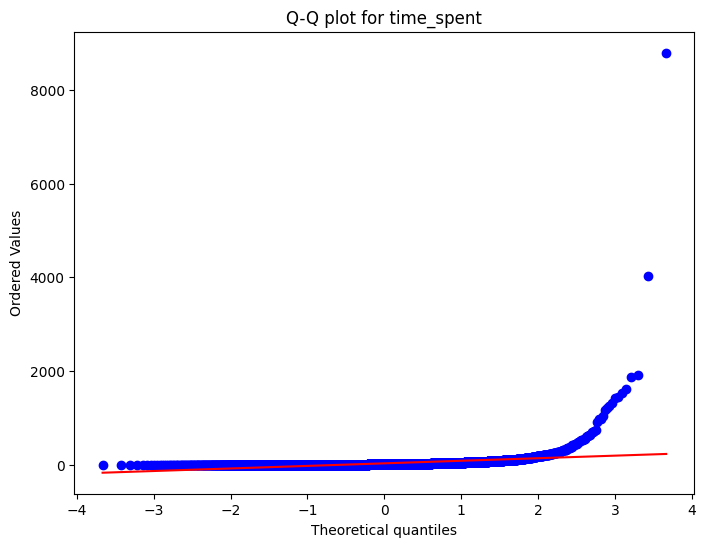

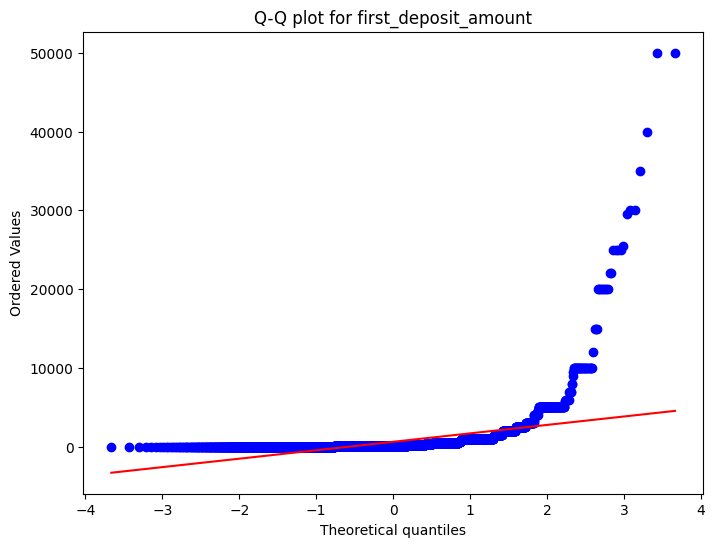

Shapiro-Wilk Test for time_spent: p-value = 1.256269885571542e-95
Shapiro-Wilk Test for first_deposit_amount: p-value = 7.906604295809841e-92


c:\Users\cheng\Workspace\robinhood_classifer\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5584.
  res = hypotest_fun_out(*samples, **kwds)


In [7]:
import scipy.stats as stats
# Use Q-Q plots and Shapiro-Wilk tests to assess whether the numerical features follow a normal distribution.
# Q-Q Plot for normality check
for col in num_cols:
    plt.figure(figsize=(8, 6))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {col}')
    plt.show()

# Shapiro-Wilk test
for col in num_cols:
    stat, p_value = stats.shapiro(df[col])
    print(f'Shapiro-Wilk Test for {col}: p-value = {p_value}')


In [8]:
# If the p-value is below a certain threshold (e.g., 0.05), the feature is not normally distributed,
# and we might consider applying transformations like log or Box-Cox transformations.
df['log_first_deposit'] = np.log1p(df['first_deposit_amount'])  # Log transform
df['boxcox_first_deposit'], _ = stats.boxcox(df['first_deposit_amount'] + 1)  # Apply Box-Cox transformation

### Hypothesis Testing | T-Tests and Mann-Whitney U Test

In [9]:
# T-Tests and Mann-Whitney U Test for comparing means between churn and non-churn groups:
# For normally distributed data, we can use independent t-tests to compare the means between churn and non-churn users.
# For non-normally distributed data, the Mann-Whitney U test is more appropriate.

# T-Test for normally distributed variables
for col in num_cols:
    churned = df[df['churn_flag'] == 1][col]
    not_churned = df[df['churn_flag'] == 0][col]
    t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)
    print(f'T-Test for {col}: p-value = {p_value}')

# Mann-Whitney U Test for non-normally distributed variables
for col in num_cols:
    churned = df[df['churn_flag'] == 1][col]
    not_churned = df[df['churn_flag'] == 0][col]
    u_stat, p_value = stats.mannwhitneyu(churned, not_churned)
    print(f'Mann-Whitney U Test for {col}: p-value = {p_value}')


T-Test for time_spent: p-value = 0.410599170093216
T-Test for first_deposit_amount: p-value = 0.0045733542460421345
Mann-Whitney U Test for time_spent: p-value = 0.037753108064364715
Mann-Whitney U Test for first_deposit_amount: p-value = 6.331142904524444e-11


### Bivariate and Multivariate Hypothesis Testing | Chi-Square Test & ANOVA

In [11]:
# Chi-Square Test: For testing relationships between categorical variables like platform, risk_tolerance, and churn.
# Chi-Square test for categorical variables
cat_cols = ['risk_tolerance', 'investment_experience', 'liquidity_needs', 'platform', 'time_horizon']
for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df['churn_flag'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {col}: p-value = {p}')

#ANOVA: If we have more than two groups (e.g., risk tolerance levels), we can use ANOVA to check for significant differences between group means.
# ANOVA test for multiple groups
from statsmodels.formula.api import ols
import statsmodels.api as sm

model = ols('first_deposit_amount ~ C(risk_tolerance)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Chi-Square Test for risk_tolerance: p-value = 2.60977432856598e-08
Chi-Square Test for investment_experience: p-value = 0.7299293533337432
Chi-Square Test for liquidity_needs: p-value = 0.47576290627539386
Chi-Square Test for platform: p-value = 0.025239039008158375
Chi-Square Test for time_horizon: p-value = 0.28038907900564075
                         sum_sq      df         F    PR(>F)
C(risk_tolerance)  5.110733e+07     2.0  5.704268  0.003351
Residual           2.500145e+10  5581.0       NaN       NaN


### Correlation and Multicollinearity Analysis | VIF

In [15]:
# We should also examine the multicollinearity of our features, especially if we are considering logistic
# regression or other linear models.

# Variance Inflation Factor (VIF) to detect multicollinearity:
# Calculating VIF for numerical features
vif_data = pd.DataFrame()
vif_data['Feature'] = num_cols
vif_data['VIF'] = [variance_inflation_factor(df[num_cols].values, i) for i in range(len(num_cols))]
print(vif_data)


                Feature       VIF
0            time_spent  1.003801
1  first_deposit_amount  1.003801


### Advanced Distribution Analysis: Fitting data to other distributions (e.g., Poisson, Exponentia

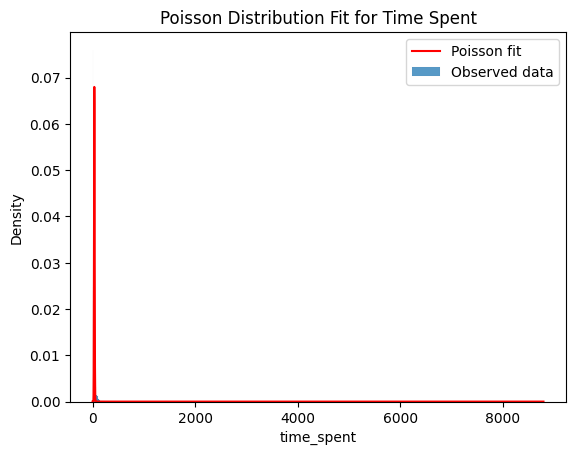

In [18]:
# You can fit various distributions to see which one best describes your numerical data,
# especially when not normally distributed.
# Fit a Poisson distribution for count-like data
from scipy.stats import poisson

# poisson_fit = poisson.fit(df['time_spent'])
# sns.histplot(df['time_spent'], kde=False, stat="density")
# plt.plot(np.arange(0, max(df['time_spent']), 1), poisson.pmf(np.arange(0, max(df['time_spent']), 1), *poisson_fit))
# plt.title('Poisson Distribution Fit for Time Spent')
# plt.show()
# Assuming 'time_spent' is count-like data
mean_time_spent = df['time_spent'].mean()

# Plot the histogram of the data
sns.histplot(df['time_spent'], kde=False, stat="density", label="Observed data")

# Generate the Poisson distribution PMF
x = np.arange(0, max(df['time_spent']) + 1, 1)
poisson_pmf = poisson.pmf(x, mean_time_spent)

# Plot the Poisson PMF
plt.plot(x, poisson_pmf, 'r-', label="Poisson fit")
plt.title('Poisson Distribution Fit for Time Spent')
plt.legend()
plt.show()



### Multivariate Analysis | Interactions

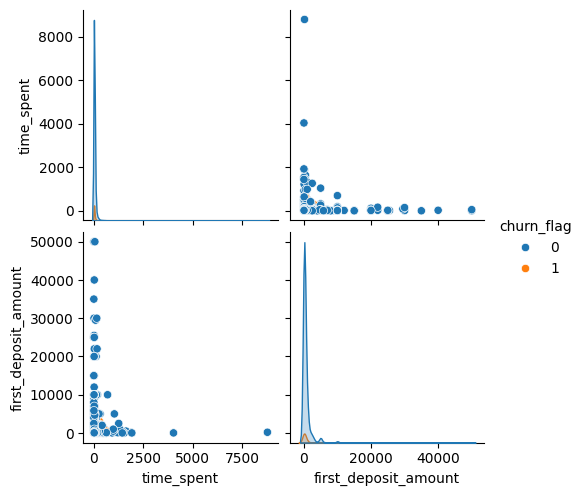

In [20]:
# Interaction Terms: To capture relationships between variables and churn, you can explore interaction effects.
# Creating interaction terms
# One-hot encoding the 'platform' variable
df_encoded = pd.get_dummies(df, columns=['platform'], drop_first=True)

# Creating interaction terms between 'time_spent' and each one-hot encoded platform
for col in df_encoded.columns:
    if 'platform_' in col:
        df_encoded[f'time_spent_{col}_interaction'] = df_encoded['time_spent'] * df_encoded[col]

# Exploring interaction using pairplot
sns.pairplot(df_encoded[['time_spent', 'first_deposit_amount', 'churn_flag']], hue='churn_flag')
plt.show()
# df['time_spent_platform_interaction'] = df['time_spent'] * df['platform']

# # Exploring interaction using pairplot
# sns.pairplot(df[['time_spent', 'first_deposit_amount', 'platform', 'churn_flag']], hue='churn_flag')
# plt.show()


### Outlier Detection and Handling | ZSCORE & IQR

In [21]:
# Detecting outliers using Z-scores

z_scores = np.abs(stats.zscore(df[num_cols]))
outliers = (z_scores > 3).sum(axis=0)  # Count of outliers per column
print(f'Number of outliers per column: {outliers}')


# Need to fill in IAR using BoxPLot

Number of outliers per column: time_spent              31
first_deposit_amount    62
dtype: int64


In [1]:
'''

Based on EDA, we may need to transform features for better model performance:

Log Transformation: For highly skewed data, log transformation can normalize distributions.
Box-Cox Transformation: Helps normalize data and is more flexible than log transformations.
The decision to apply transformations should be based on how well the feature distribution aligns with the assumptions of the chosen models (e.g., logistic regression assumes normality).

Summary of Additions:
Normality Checks: Q-Q plots and Shapiro-Wilk tests for normality.
Hypothesis Testing: T-tests, Mann-Whitney U, Chi-Square, and ANOVA to assess differences between churn and non-churn groups.
Transformation Decisions: Log, Box-Cox transformations based on distribution analysis.
Correlation and Multicollinearity: VIF and correlation heatmaps.
Advanced Distribution Fitting: Fit Poisson or other distributions as necessary.
Outlier Detection: Using Z-scores or IQR.
By adding these methods, we ensure a comprehensive statistical and data science-driven EDA, leading to better understanding of the data structure and
subsequent decisions for model selection and feature engineering. Would you like to implement any specific sections first, or would you like the full Jupyter notebook with these enhancements?'''

'\n\nBased on EDA, we may need to transform features for better model performance:\n\nLog Transformation: For highly skewed data, log transformation can normalize distributions.\nBox-Cox Transformation: Helps normalize data and is more flexible than log transformations.\nThe decision to apply transformations should be based on how well the feature distribution aligns with the assumptions of the chosen models (e.g., logistic regression assumes normality).\n\nSummary of Additions:\nNormality Checks: Q-Q plots and Shapiro-Wilk tests for normality.\nHypothesis Testing: T-tests, Mann-Whitney U, Chi-Square, and ANOVA to assess differences between churn and non-churn groups.\nTransformation Decisions: Log, Box-Cox transformations based on distribution analysis.\nCorrelation and Multicollinearity: VIF and correlation heatmaps.\nAdvanced Distribution Fitting: Fit Poisson or other distributions as necessary.\nOutlier Detection: Using Z-scores or IQR.\nBy adding these methods, we ensure a compreh